# Predicting Wine Quality using Wine Quality Dataset
It’s a well-established fact that age makes wine better – the older the wine, the better it will taste. However, age is not the only thing that determines a wine’s taste. Numerous factors determine the wine quality certification, including physicochemical tests such as alcohol quantity, fixed acidity, volatile acidity, density, and pH level, to name a few. 
In this ML project, you need to develop an ML model that can explore a wine’s chemical properties to predict its quality. The wine quality dataset you’ll be using for this project consists of approximately 4898 observations, including 11 independent variables and one dependent variable. Mentioning Machine Learning projects for the final year can help your resume look much more interesting than others.


### The requirements for the project are
 
Explain feature engineering
 Trying cross validation and Hyperparameters tuning will be a plus.
 Try at least 2 models and prepare the report with the performance comparison and reasoning why one is better than another.

### Our goals for this notebook:

<b>Part 1:</b> Exploratory Data Analysis and Data wrangling<br/>

Exploratory Data Analysis: 
understand the data by EDA and derive simple models with Pandas as baseline

Data wrangling:
fill nan, convert categorical to numerical,
create train and test data for ML algorithms

<b>Part 2:</b> Scikit-learn basic ML algorithms
implement different Classifiers from the sklearn library:
Logistic regression, Gaussian naive Bayes, KNN, Decision tree, Random forest, SVM

<b>Part 3:</b> Comparison of Model results
use metrics like confusion_matrix, classification_report, accuracy_score
and implement k fold cross validation for comparison of test score

#### imports

In [1]:
import pandas as pd
import numpy as nnp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline

import matplotlib.cbook
warnings.filterwarnings('ignore')

# Part 1: Exploratory Data Analysis and Data wrangling

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In dataset some values for 
<b> fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH, sulphates</b>
are missing. 
Solve this problem by filling null values with mean values

## Fill N/A

In [6]:
df.fillna(df.mean(axis=0), inplace=True)
df.head(20)
# instead of
# df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
# df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
# df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
# df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
# df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
# df['pH'].fillna(df['pH'].mean(), inplace=True)
# df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)
# df.head(20)



,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.000000,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.300000,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.100000,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.200000,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.200000,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.100000,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.200000,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.000000,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.300000,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.100000,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [7]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Visualizing the Data
Find outliers

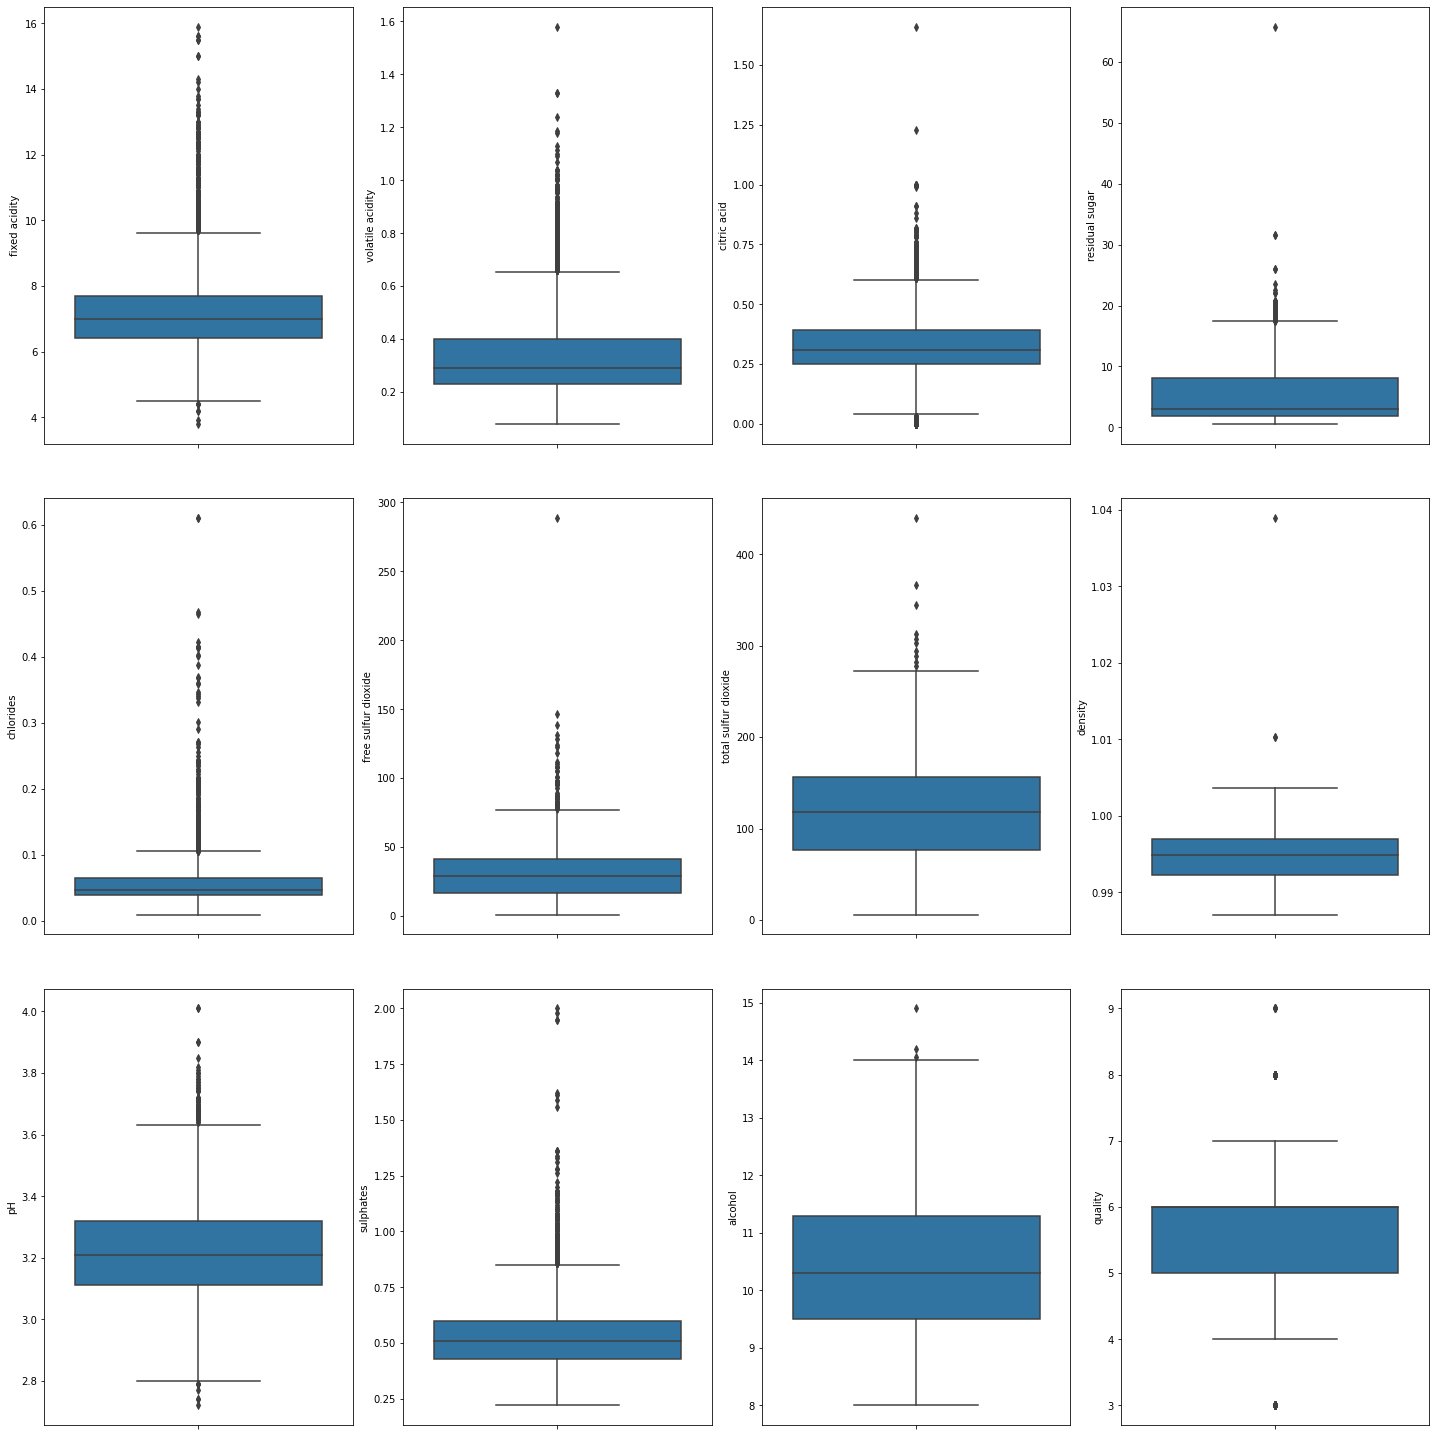

In [8]:
fig,ax = plt.subplots(ncols = 4, nrows = 3, figsize = (20, 20))
index = 0
ax = ax.flatten()
for column, value in df.items():
    if column != 'type':
        sns.boxplot(y = column, data = df, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.9, w_pad = 0.7, h_pad = 5.0)

#### Check correlation between each features

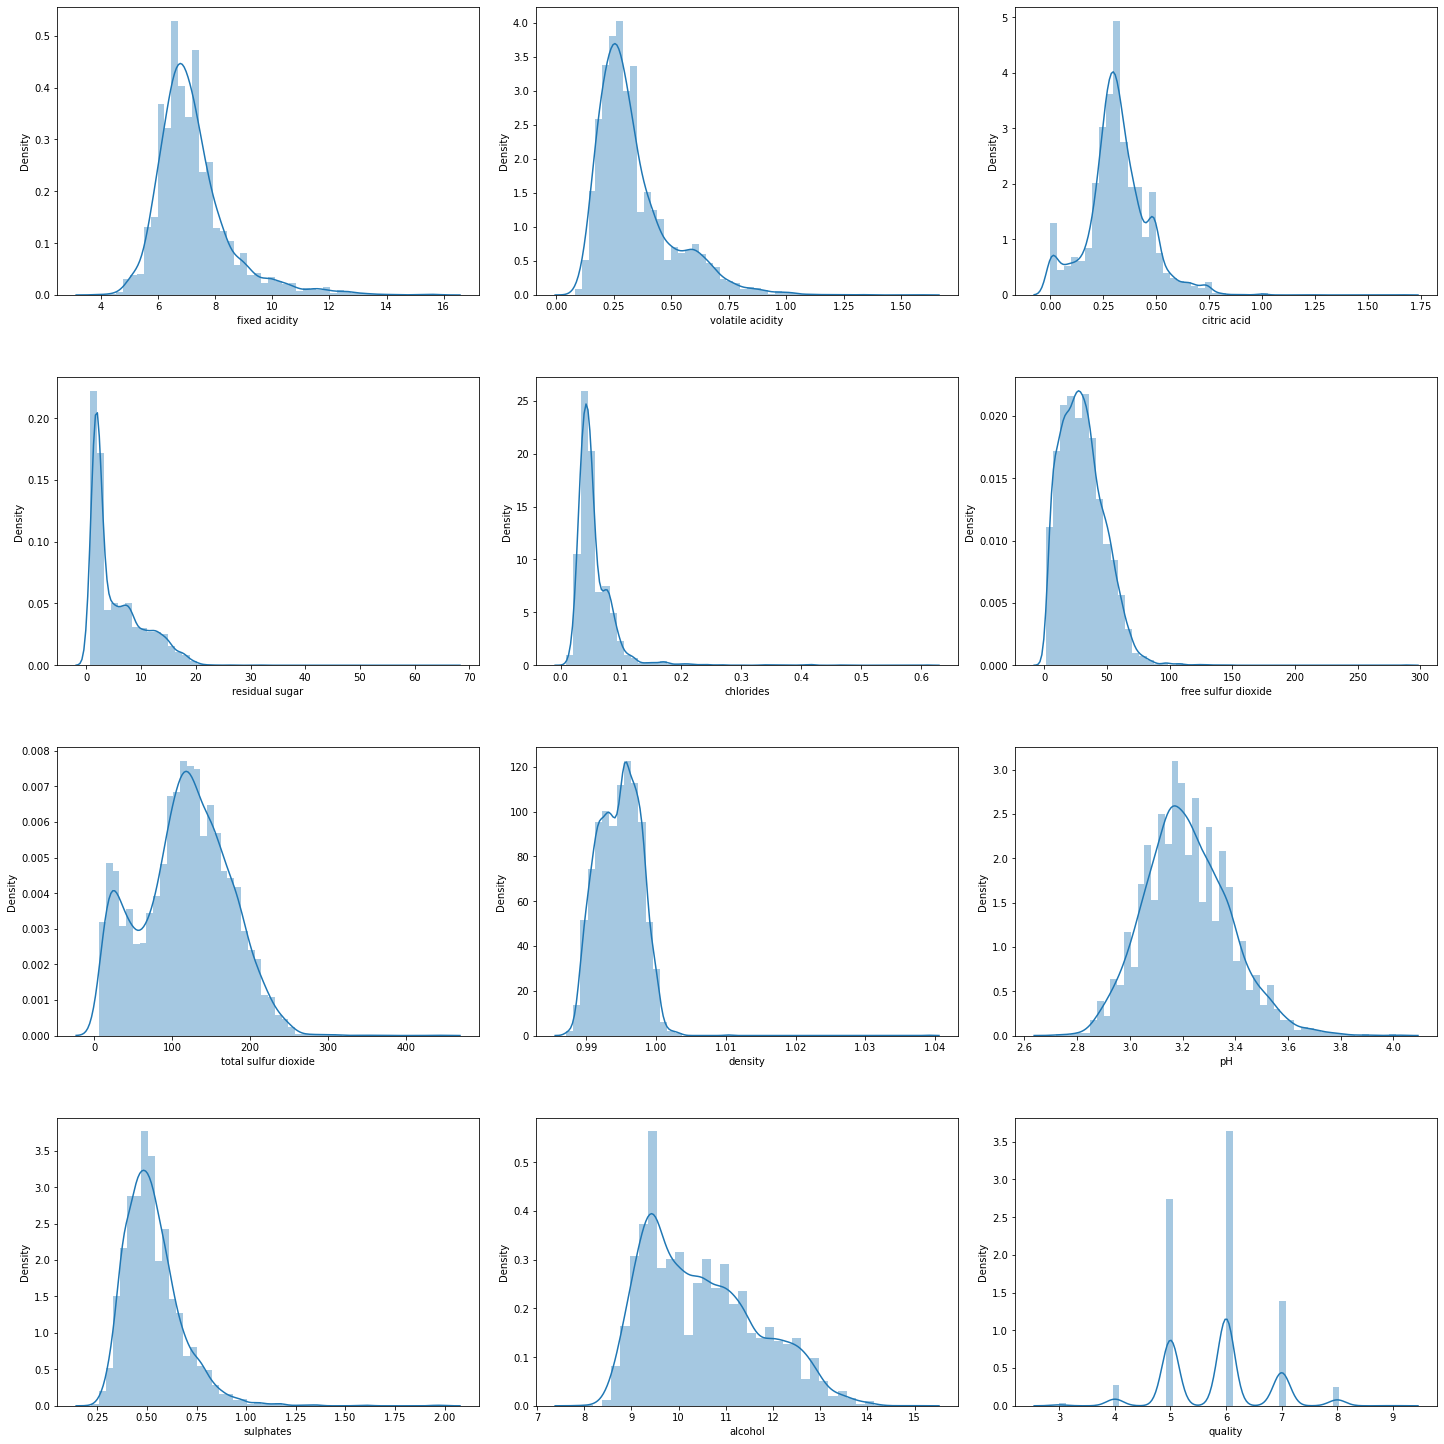

In [9]:
fig,ax = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))
index = 0
ax = ax.flatten()
for column, value in df.items():
    if column != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

## Wine quality distribution

#### main wine types are distributed between 5 and 7  qualities

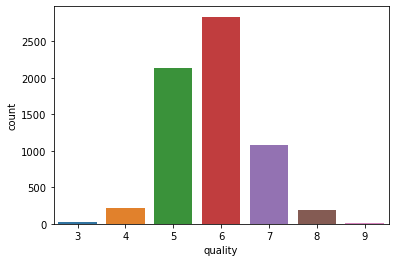

In [10]:
sns.countplot(x='quality', data=df);

#### Share of 6 quality is 43%

In [11]:
sum(df['quality'] == 6) / df.shape[0]

0.43650915807295676

## The correlation between quality and wine types

In [12]:
df.groupby(['quality', 'type'])['quality'].count()

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: quality, dtype: int64

#### share of white wines is 75%.

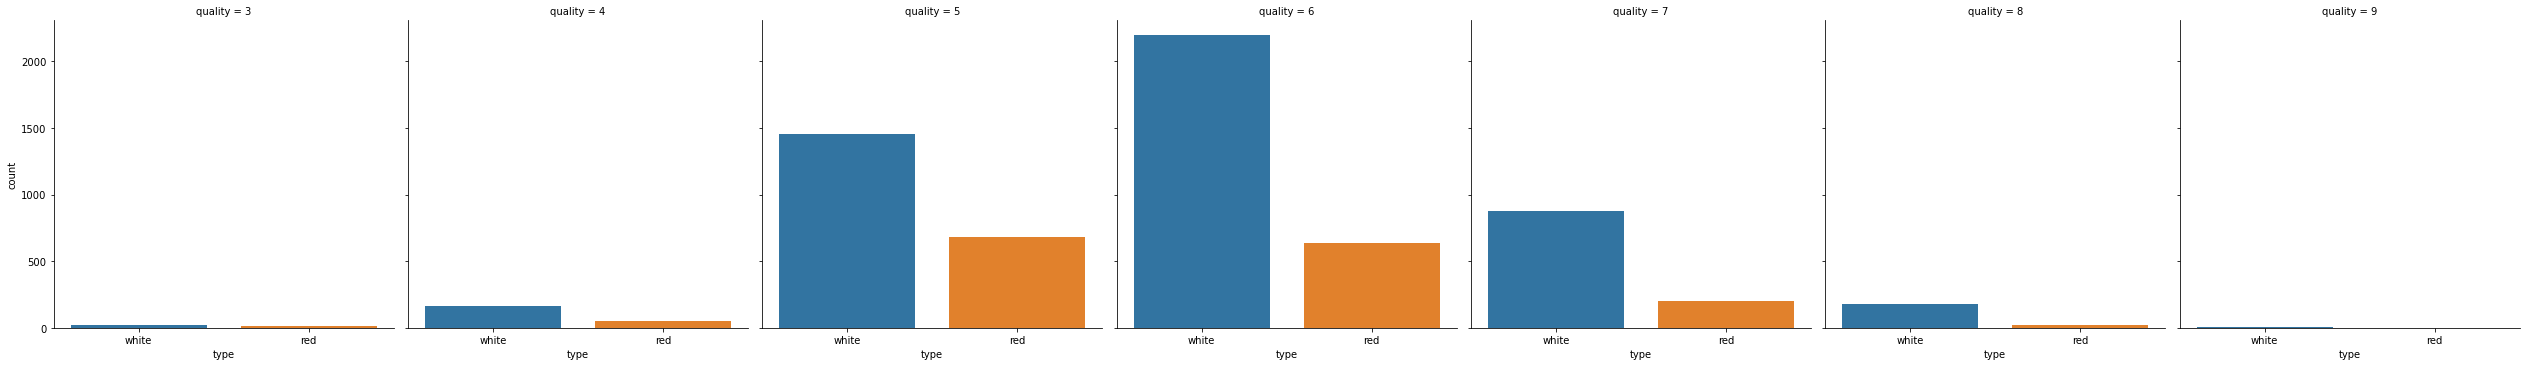

In [13]:
#plt.rcParams['figure.figsize'] = (25, 25)
sns.catplot(x='type', col='quality', kind='count', data=df);
# share of white wine types is quite higher than red wine types


In [14]:
pd.crosstab(df.type, df.quality, margins=True).style.background_gradient(cmap='autumn_r')

quality,3,4,5,6,7,8,9,All
type,,,,,,,,
red,10,53,681,638,199,18,0,1599
white,20,163,1457,2198,880,175,5,4898
All,30,216,2138,2836,1079,193,5,6497


In [15]:
m_white = df[df['type']=='white']['quality'].mean() 
# the same result: df.loc[(df['type']=='white'), 'quality'].mean() 
m_red = df[df['type']=='red']['quality'].mean()
print(f"Mean of white wine type's quality is: {m_white}")
print(f"Mean of red wine type's quality is: {m_red}")

Mean of white wine type's quality is: 5.87790935075541
Mean of red wine type's quality is: 5.6360225140712945


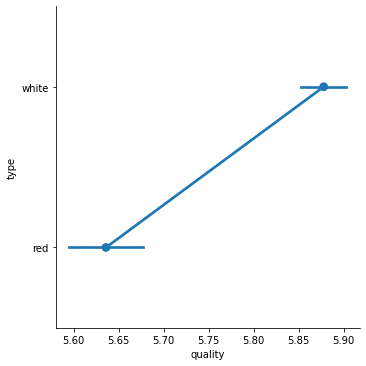

In [16]:
sns.catplot('quality', 'type', kind='point', data=df);

#### It seems quality of white wines is higher than red

## Features Relationship

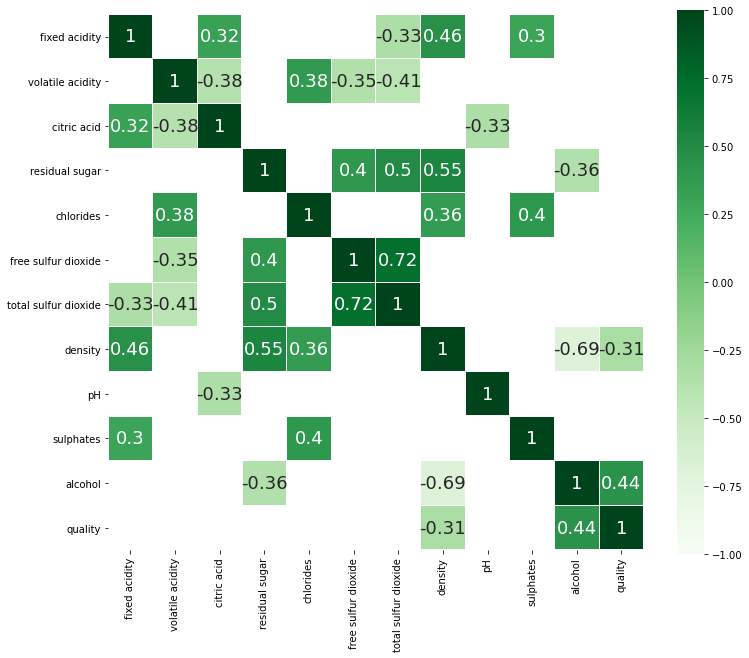

In [17]:
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='Greens', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True);


##### Get the mean() relationship between <quality> and other features

In [18]:
fig,ax = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))
index = 0
ax = ax.flatten()
for column, value in df.items():
    if column != 'type':
        
        df.groupby('quality')[column].mean().plot.line(ax = ax[index], ylabel=column)
        #ax.set_ylabel(column)
        plt.ylabel(column)
        plt.title(column)
        index += 1
        
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

Error in callback <function flush_figures at 0x0000014ED7BB0CA0> (for post_execute):


KeyboardInterrupt: 

## Feature Scaling
#### One Hot Encoding

In [19]:
df = pd.get_dummies(data=df, columns=['type'], drop_first=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0


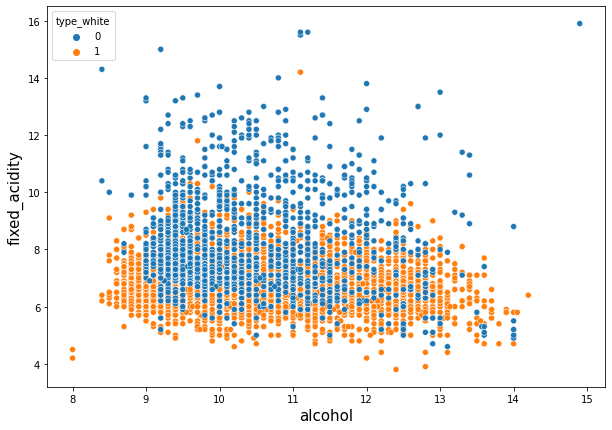

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="alcohol",y="fixed acidity",data=df, hue='type_white',marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

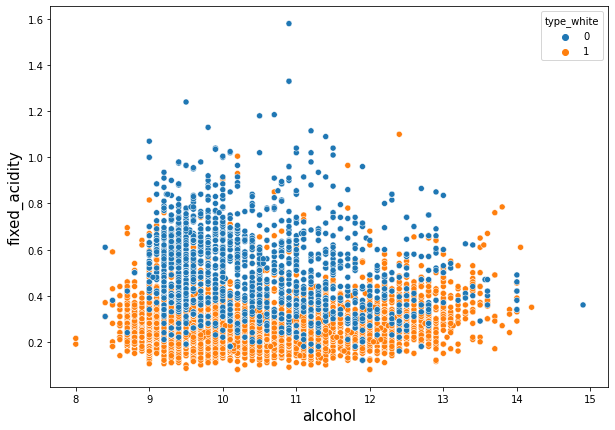

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="alcohol",y="volatile acidity",data=df, hue='type_white',marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

### From all this analyze we can see that there are some outliers. So we have 2 variants

### 1. Remove this outliers.
### 2. Replace them with max/min values, so they may contain good values for other features and this variant will save their values

##### We will user 1st variant for this project

In [22]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### 1. Remove this outliers.

In [23]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()
print(lower_limit,upper_limit)
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]
print(f"{df.shape[0] - df2.shape[0]} rows were deleted as a result")

-22.722879937833156 83.77351869418224
36 rows were deleted as a result


In [24]:
lower_limit = df['total sulfur dioxide'].mean() - 3*df['total sulfur dioxide'].std()
upper_limit = df['total sulfur dioxide'].mean() + 3*df['total sulfur dioxide'].std()
print(lower_limit,upper_limit)
df3 = df2[(df2['total sulfur dioxide']>lower_limit) & (df2['total sulfur dioxide']<upper_limit)]
print(f"{df2.shape[0] - df3.shape[0]} rows were deleted as a result")

-53.82098914892836 285.31013798685353
5 rows were deleted as a result


In [25]:
lower_limit = df['residual sugar'].mean() - 3*df['residual sugar'].std()
upper_limit = df['residual sugar'].mean() + 3*df['residual sugar'].std()
print(lower_limit,upper_limit)
df4 = df3[(df3['residual sugar']>lower_limit) & (df3['residual sugar']<upper_limit)]
print(f"{df3.shape[0] - df4.shape[0]} rows were deleted as a result")

-8.827850244103846 19.716503053957613
26 rows were deleted as a result


In [26]:
df4.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
5428,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.300000,6,0
1221,5.9,0.40,0.32,6.0,0.034,50.0,127.0,0.99200,3.51,0.58,12.500000,7,1
460,7.1,0.21,0.27,8.6,0.056,26.0,111.0,0.99560,2.95,0.52,9.500000,5,1
4353,7.4,0.16,0.30,1.4,0.064,34.0,166.0,0.99136,3.11,0.42,11.433333,6,1
706,6.2,0.31,0.21,6.3,0.041,50.0,218.0,0.99410,3.15,0.60,10.000000,5,1


### 2. Replace them with max/min values, so they may contain good values for other features and this variant will save their values

In [27]:
import numpy as np
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()
print(lower_limit,upper_limit)
df2_repl = df


def replace_outliers(arr):
    arr = np.array(arr)
    upper = arr.mean() + 3 * arr.std()
    lower = arr.mean() - 3 * arr.std()
    arr[(arr > upper)] = upper
    arr[(arr < lower)] = lower
    return arr


df2_repl["free sulfur dioxide"] = replace_outliers(df2_repl["free sulfur dioxide"])
lower_limit = df2_repl["free sulfur dioxide"].mean() - 3*df2_repl["free sulfur dioxide"].std()
upper_limit = df2_repl["free sulfur dioxide"].mean() + 3*df2_repl["free sulfur dioxide"].std()
print(lower_limit,upper_limit)

-22.722879937833156 83.77351869418224
-20.77329949410528 81.55479838364607


In [28]:
df2_repl[(df2_repl["free sulfur dioxide"] > upper_limit)] = upper_limit

### Combining fixed acidity, volatile acidity and citric acid into one variable total_acidity

Text(0, 0.5, 'total_acidity')

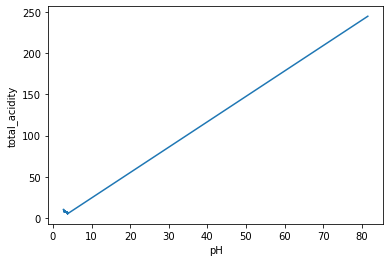

In [29]:
df["total_acidity"]= df['fixed acidity']+df['volatile acidity']+df['citric acid']
df.groupby('pH')['total_acidity'].mean().plot.line()
plt.ylabel("total_acidity")

### Now lets Change the quality Categorical 'String' Variables into Numerical Variables

In [30]:
quality_mapping = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}
df4['quality'] = df4['quality'].map(quality_mapping)
df4.quality.value_counts()

Medium    5997
Low        239
High       194
Name: quality, dtype: int64

In [31]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium,1


In [32]:
quality_mapping = {"Low": 0, "Medium": 1, "High": 2}
df4['quality'] = df4['quality'].map(quality_mapping)
df4.quality.value_counts()

1    5997
0     239
2     194
Name: quality, dtype: int64

## Red wine
### let's choose the features that had correlation to our target varaible: total_acidity, pH, chlorides, sulfates, alcohol

In [33]:
df_red = df4[df4["type"]=="red"]
df_red_final = df_red[["total_acidity", "chlorides", "pH", "sulphates", "alcohol", "quality"]]

KeyError: 'type'

In [ ]:
df_red.quality.value_counts()

In [ ]:
sns.countplot(df_red['quality'])

# Part 2: Scikit-learn basic ML algorithms implementations 
### imports

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from numpy import mean, std
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
def get_dataset(dataframe):
    X = dataframe.drop("quality", axis = 1)
    y = dataframe["quality"]
    X = StandardScaler().fit_transform(X)
    return X, y

In [ ]:
X, y = get_dataset(df_red_final)

In [ ]:
#divide the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 1. Logistic regression

In [ ]:
log_reg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.fit(X_train,y_train)

#### Let's predict target values for test dataset and check model accuracy

In [ ]:
y_hat = log_reg.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_hat,y_test)
accuracy

In [ ]:
log_reg.intercept_

In [ ]:
log_reg.coef_

In [ ]:
cm = confusion_matrix(y_hat,y_test)
cm

## 2. Cross-validation- KFold

In [ ]:
# create the dataset transformation function
def fit_dataset(dataframe):
    X = dataframe.drop('quality', axis=1)
    y = dataframe['quality']
    X = StandardScaler().fit_transform(X)
    return X, y

X, y = get_dataset(df_red_final)

# retrieve the model to be evaluate
def get_model():
    model = LogisticRegression()
    return model

# evaluate the model using a given test condition
def evaluate_model(cv):
    # get the dataset
    X, y = fit_dataset(df_red_final)
    # get the model
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

In [ ]:
# define folds to test
folds = range(2,31)
folds

In [ ]:
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

In [ ]:

# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot

plt.show()

## 3. RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
accuracy2 = metrics.accuracy_score(y_pred, y_test)
accuracy2

In [ ]:
cm2 = confusion_matrix(y_pred,y_test)
cm2

We got higher accuracy score in case of RandomForest model, so we will choose this model for predicting wine quality.

## Comparison of the results of several models

In [ ]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
# create the dataset
def fit_dataset(dataframe):
    X = dataframe.drop('quality', axis=1)
    y = dataframe['quality']
    X = StandardScaler().fit_transform(X)
    return X, y

# get a list of models to evaluate
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(DecisionTreeClassifier())
    models.append(ExtraTreeClassifier())
    models.append(RandomForestClassifier())
    return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, y = get_dataset(df_red_final)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)
 
# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
    # check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue
    # store results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
    # summarize progress
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

### Here we also got higher accuracy score in case of RandomForest model, so we will choose this model for predicting wine quality